# Learning how to understand a project management dataset and build models in Python for further analysis
Today we will be exploring a synthetically generated dataset based on the PERIL database. Learn more about the PERIL dataset and it's creator Tom Kendrick [here](http://www.failureproofprojects.com/peril.php). 

To accomplish our task of understanding the data, we will need to use some Python libraries. Python libraries can be summarized as code other people have written and shared that we can use to save us time. We can import and use that code with a small import statement. Some of the packages we will use today include [Pandas](https://towardsdatascience.com/a-quick-introduction-to-the-pandas-python-library-f1b678f34673), [Scipy](https://www.scipy.org/getting-started.html), [Numpy](https://docs.scipy.org/doc/numpy-1.15.0/user/whatisnumpy.html), and [MatPlotLib](https://matplotlib.org/). If you want to learn more about how these different packages work with examples, click [here](http://cs231n.github.io/python-numpy-tutorial/). If you would like to see the code that imports these packages - click the show code button below. 

In [3]:
#Importing python libraries which help us speed our coding up.
#The packages we're importing are below.
import pandas as pd
import random
from pandas.plotting import scatter_matrix
import scipy as sc
import numpy as np
import matplotlib
import matplotlib.pyplot as plt #Can abbreviate specific parts of the packages so it's easier to type
import sklearn as sk
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model

In [4]:
#We will now read the data in and store it in a dataframe called dataset
dataset = pd.read_excel('Peril_Dataset.xlsx', header = 0)
dataset.insert(loc = 0, column = 'Project Number', value = np.arange(len(dataset)))

#### Understanding our data
Let's run some code and see how many rows and columns we have. Below - you will see the result as (Number of Rows, Number of Columns)

In [5]:
dataset.shape

(5000, 13)

#### What do the first 10 rows of our data look like? 

In [6]:
dataset.head(10)

,Project Number,Parameter,Category,Sub cat,Impact,TRL,Description,Region Numeric,Region,Project,Year,Month,Cost
0,0,Resource,Money,Limitation,18,5,Did not have sufficient resources and the cont...,0,Americas,IT/Solution,2010,October,700560
1,1,Resource,Outsourcing,Delayed start,17,4,Contractor setup delayed by a week,0,Americas,Prod. Dev.,2002,May,347922
2,2,Resource,Outsourcing,Late or poor output,13,5,Contractor did not spend time on the project b...,0,Americas,IT/Solution,2002,August,919828
3,3,Resource,Outsourcing,Late or poor output,13,7,Contractors failed to show up as committed,1,Asia,IT/Solution,2014,July,521495
4,4,Resource,Outsourcing,Late or poor output,13,3,Third-party vendor inadvertently introduced a ...,0,Americas,IT/Solution,2010,November,322010
5,5,Resource,Outsourcing,Late or poor output,16,7,Outsouced staff lacked the necessary skillset,3,Africa,IT/Solution,2014,June,498896
6,6,Resource,People,Late start,15,5,Planning delayed due to staff being still tied...,0,Americas,Prod. Dev.,2015,April,592785
7,7,Resource,People,Loss,16,4,Chef quit two days before the café was schedul...,3,Africa,IT/Solution,2017,October,578928
8,8,Resource,People,Motivation,11,5,Work at customer site had to be done by union ...,3,Africa,IT/Solution,2003,July,318846
9,9,Resource,People,Queuing,16,6,Critical task assigned to a heavily booked expert,0,Americas,IT/Solution,2010,June,1109120


#### What are our column names?
##### As you can see above - we have 12 columns with different values
Project Number: A unique number to identify each project.  
Parameter: The parameter of the project that was impacted. This dataset categorizes the risk in these three main groups of Scope, Resource, and Schedule.   
Category: The category of the risk. We have the following categories in the main parameters - Change(Scope), Defect(Scope), People(Resource), Money(Resource), Outsourcing(Resource), Delay(Schedule), Dependency(Schedule), Estimates(Schedule)  
Sub cat: The sub-category of the risk are the following - Creep, Dependency, Gap, Hardware, Software, Integration, Limitation, Late Start, Loss, Motivation, Queuing, Temp Loss, Decision, Information, Parts, Infrastructure, Legal, Project, Deadline, Judgement, and Learning 

<br>
Below is the mapping for the Parameter -> Category -> Sub category:
<br>

*  Scope -> Change -> Creep
*  Scope -> Change -> Dependency
*  Scope -> Change -> Gap  
<br>

*  Scope -> Defect -> Hardware
*  Scope -> Defect -> Software
*  Scope -> Defect -> Integration 
<br>

*  Resource -> Money -> Limitation  
<br>
*  Resource -> People -> Late Start
*  Resource -> People -> Loss
*  Resource -> People -> Motivation
*  Resource -> People -> Queuing
*  Resource -> People -> Temp Loss  
<br>
*  Schedule -> Delay -> Decision
*  Schedule -> Delay -> Hardware
*  Schedule -> Delay -> Information
*  Schedule -> Delay -> Parts  
<br>
*  Schedule -> Dependency -> Infrastructure
*  Schedule -> Dependency -> Legal
*  Schedule -> Dependency -> Project  
<br>
*  Schedule -> Estimates -> Deadline
*  Schedule -> Estimates -> Judgement
*  Schedule -> Estimates -> Learning  
<br>

Impact: The impact to the project by number of weeks.  
TRL: The technology readiness level of the project. You can find more information [here](http://acqnotes.com/acqnote/tasks/technology-readiness-level).  
Description: The description of the issue.  
Region Numeric: A numeric value representing the region (0 = Americas, 1 = Asia, 2 = Eur/ME, 3 = Africa).  
Region: What region of the world did the issue occur in.  
Project: What type of project did the issue occur in. (Prod. Dev., or IT/Solution)
Year: The year the issue occurred in.  
Cost: The cost, in USD, of the impact on the project.  
Month: The month the project failure occurred in.   

#### Now let's get a breakdown of what are the counts of the values in each column
Here we can see that there are three different types of parameters that each project is grouped into that we have: Scope, Resource, and Schedule. Below the chart are the raw counts of the projects in those parameter groups. 

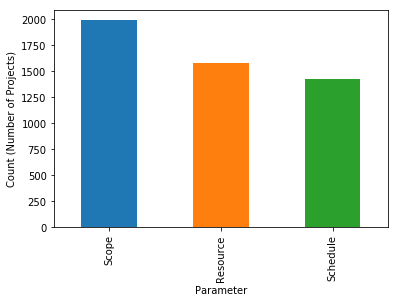

In [7]:
plot_parameter = dataset['Parameter'].value_counts().plot(kind='bar')
plot_parameter.set_xlabel("Parameter")
plot_parameter.set_ylabel("Count (Number of Projects)")
plot_parameter

In [8]:
dataset["Parameter"].value_counts()

Scope       1991
Resource    1579
Schedule    1430
Name: Parameter, dtype: int64

What is the breakdown of the different Categories that we have? We find the following categories: Change, People, Delay, Defect, Outsourcing, Estimates, Dependency, and Money. Below the chart are the raw counts of the projects in those categories. 

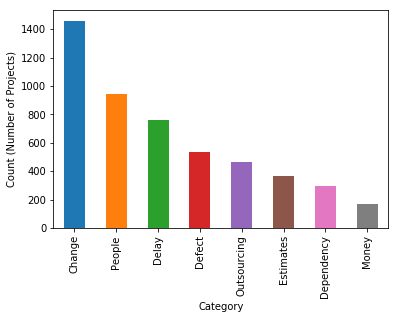

In [9]:
plot_category = dataset['Category'].value_counts().plot(kind='bar')
plot_category.set_xlabel("Category")
plot_category.set_ylabel("Count (Number of Projects)")
plot_category

In [10]:
dataset["Category"].value_counts()

Change         1459
People          943
Delay           763
Defect          532
Outsourcing     465
Estimates       369
Dependency      298
Money           171
Name: Category, dtype: int64

What is the breakdown of the sub-categories? Here we find the following: Gap, Creep, Late or poor output, Hardware, Parts, Loss, Temp loss, Queueing, Software, Learning, Limitation, Information, Judgement, Decision, Dependency, Infrastructure, Project, Late start, Delayed start, Integration, Deadline, Motivation, Legal, Project, Infrastructure, and Late or poor output. Below the chart are the raw counts of the projects in those sub-categories. 

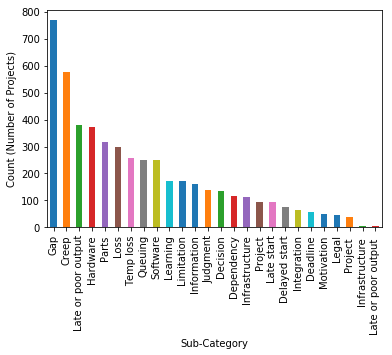

In [11]:
plot_subcat = dataset['Sub cat'].value_counts().plot(kind='bar')
plot_subcat.set_xlabel("Sub-Category")
plot_subcat.set_ylabel("Count (Number of Projects)")
plot_subcat

In [12]:
dataset["Sub cat"].value_counts()

Gap                     768
Creep                   576
Late or poor output     380
Hardware                373
Parts                   315
Loss                    298
Temp loss               256
Queuing                 250
Software                249
Learning                173
Limitation              171
Information             161
Judgment                138
Decision                134
Dependency              115
Infrastructure          113
Project                  95
Late start               93
Delayed start            76
Integration              63
Deadline                 58
Motivation               51
Legal                    46
Project                  37
Infrastructure            7
Late or poor output       4
Name: Sub cat, dtype: int64

Here you can see that the Region column has four separate regions and the count of values in those regions is provided below in the table. 

In [13]:
dataset["Region"].value_counts()

Americas    2872
Eur/ME       945
Africa       636
Asia         547
Name: Region, dtype: int64

What years do we have in our dataset? 2001-2019

In [14]:
dataset["Year"].value_counts()

2010    578
2007    435
2019    364
2015    341
2002    267
2013    235
2003    233
2005    226
2012    225
2006    223
2004    223
2018    221
2001    219
2016    212
2011    205
2009    199
2008    199
2017    198
2014    197
Name: Year, dtype: int64

What is the cost distribution in our data? We find that we have a median between "$500,000"  and  "$1,000,000" and the cost values are skewed to the left.

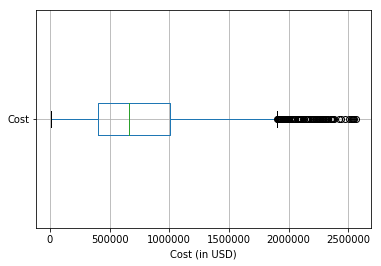

In [15]:
boxplot = dataset.boxplot(column=['Cost'], vert = False)
boxplot.set_xlabel("Cost (in USD)")
boxplot

What is the distribution of the Impact levels in our data? 

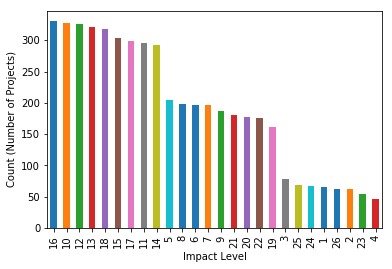

In [16]:
plot_impact = dataset['Impact'].value_counts().plot(kind='bar')
plot_impact.set_xlabel("Impact Level")
plot_impact.set_ylabel("Count (Number of Projects)")
plot_impact

## Analysis
#### Below we'll start looking at analyzing projects from different perspectives to understand which parameters, categories, sub-categories, TRL levels, regions, project types, and dates produced the highest costs and impacts. 

The Column Names and Values that can be inputted below: 

##### The Project Number
* A number between 0-4999. 

##### Parameter 
* Scope
* Resource
* Schedule

##### Category
* Change
* Defect
* Delay
* Dependency
* Estimates
* Money
* Outsourcing 
* People

##### Sub cat   
* Creep
* Dependency
* Gap
* Hardware
* Software
* Integration
* Limitation
* Late Start
* Loss
* Motivation
* Queuing
* Temp Loss
* Decision
* Information
* Parts
* Infrastructure
* Legal
* Project
* Deadline
* Judgement
* Learning 

##### Impact 
* Numbers between 1-26 in weeks

##### TRL 
* Numbers between 1-9

##### Description 

##### Region Numeric
* 0: Americas
* 1: Asia
* 2: Eur/ME
* 3: Africa

##### Region 
* Americas
* Asia
* Eur/ME
* Africa

##### Project 
* IT/Solution
* Prod. Dev.

##### Year 
* Years from 2001-2019

##### Cost 
* Number between 10787 and 2543242

##### Month 
* Any month in the calendar year (January - December)

__Let's say we want to look at the data for the projects in the Americas region - we can run the following code. If you want to see the data for a difference region then change 'Americas' to a different region (copy and paste the region name from above). For example you can copy and paste the line below to see the data for just the Europe/Middle East region:__


Copy and paste the code below: <br>
region_filter = dataset.loc[dataset['Region'] == 'Eur/ME'] <br>
region_filter.head(50) 

In [17]:
region_filter = dataset.loc[dataset['Region'] == 'Americas']
region_filter.head(50) #Let's look at the first 50 values

,Project Number,Parameter,Category,Sub cat,Impact,TRL,Description,Region Numeric,Region,Project,Year,Month,Cost
0,0,Resource,Money,Limitation,18,5,Did not have sufficient resources and the cont...,0,Americas,IT/Solution,2010,October,700560
1,1,Resource,Outsourcing,Delayed start,17,4,Contractor setup delayed by a week,0,Americas,Prod. Dev.,2002,May,347922
2,2,Resource,Outsourcing,Late or poor output,13,5,Contractor did not spend time on the project b...,0,Americas,IT/Solution,2002,August,919828
4,4,Resource,Outsourcing,Late or poor output,13,3,Third-party vendor inadvertently introduced a ...,0,Americas,IT/Solution,2010,November,322010
6,6,Resource,People,Late start,15,5,Planning delayed due to staff being still tied...,0,Americas,Prod. Dev.,2015,April,592785
9,9,Resource,People,Queuing,16,6,Critical task assigned to a heavily booked expert,0,Americas,IT/Solution,2010,June,1109120
10,10,Resource,People,Queuing,11,6,Key packaging engineer was working on a high p...,0,Americas,IT/Solution,2010,September,444774
11,11,Resource,People,Queuing,10,7,No engineer is available or has enough knowledge,0,Americas,IT/Solution,2011,July,632070
12,12,Resource,People,Queuing,10,3,People were allocated to too many projects and...,0,Americas,IT/Solution,2010,August,228730
13,13,Resource,People,Queuing,17,7,Key person not available when needed.,0,Americas,Prod. Dev.,2002,November,1261689


__What if we want to see the data for projects in the Americas that had a category of money? See below for the code to do so, you can change the category that you would like by copying and pasting the category you want from above into the code below.__

For example, if I want to look at the project in the Americas where the category is People then I could do: 
<br>
dataset.loc[(dataset['Category'] == 'People') & (dataset['Region'] == 'Americas')]

In [18]:
category_filter = dataset.loc[(dataset['Category'] == 'Money') & (dataset['Region'] == 'Americas')]
category_filter.head(50) #Let's look at the first 50 rows where the region is the Americas and the category is Money


,Project Number,Parameter,Category,Sub cat,Impact,TRL,Description,Region Numeric,Region,Project,Year,Month,Cost
0,0,Resource,Money,Limitation,18,5,Did not have sufficient resources and the cont...,0,Americas,IT/Solution,2010,October,700560
73,73,Resource,Money,Limitation,10,5,Failed to allocate enough resources and missed...,0,Americas,IT/Solution,2002,May,708760
76,76,Resource,Money,Limitation,15,6,Project budget was dramatically cut,0,Americas,IT/Solution,2009,May,832665
79,79,Resource,Money,Limitation,12,6,Severe funding cutbacks (66% of project team),0,Americas,IT/Solution,2002,September,425964
102,102,Resource,Money,Limitation,11,6,Project had limited funding and limited staffing,0,Americas,IT/Solution,2012,April,717541
118,118,Resource,Money,Limitation,16,4,Project did not have the buy-in for staffing f...,0,Americas,IT/Solution,2002,June,384800
120,120,Resource,Money,Limitation,11,5,lack of staff availability due to company down...,0,Americas,IT/Solution,2017,December,450725
121,121,Resource,Money,Limitation,17,4,Lack of money for sufficient equipment,0,Americas,Prod. Dev.,2006,June,357748
355,355,Resource,Money,Limitation,13,5,Part of the project team ran of money three mo...,0,Americas,Prod. Dev.,2009,July,777777
356,356,Resource,Money,Limitation,13,5,Development team had insufficient resources as...,0,Americas,Prod. Dev.,2005,September,779298


__How can we visualize this filtered data to understand an overview of TRL level in projects in the Americas, in the Money Category.__ 

In [19]:
g = category_filter.groupby('TRL', as_index = False)['Impact'].mean()
g['Impact'] = g['Impact'].round(2)
g

,TRL,Impact
0,1,14.75
1,2,13.50
2,3,12.45
3,4,14.17
4,5,14.71
5,6,15.54
6,7,11.78
7,8,10.75
8,9,22.00


<BarContainer object of 9 artists>

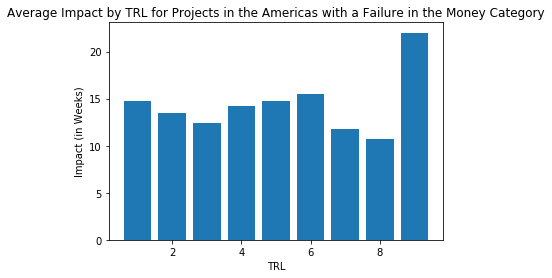

In [20]:
h = plt.bar(g['TRL'],g['Impact'])
plt.xlabel('TRL')
plt.ylabel('Impact (in Weeks)')
plt.title('Average Impact by TRL for Projects in the Americas with a Failure in the Money Category')
h

__Now that we can we graph this data easily and analyze the data for our understanding? Let's start with understanding how the average cost per failure vary by region.__

In [21]:
y = dataset.groupby('Region', as_index = False)['Cost'].mean()
y['Cost'] = y['Cost'].round(2)
y

,Region,Cost
0,Africa,744616.68
1,Americas,752808.41
2,Asia,724886.88
3,Eur/ME,778307.72


<BarContainer object of 4 artists>

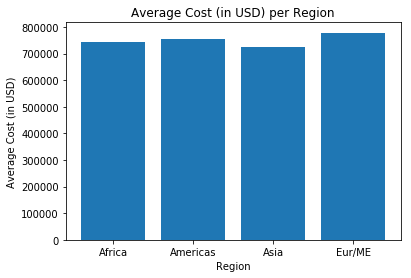

In [22]:
a = plt.bar(y['Region'],y['Cost'])
plt.xlabel('Region')
plt.ylabel('Average Cost (in USD)')
plt.title('Average Cost (in USD) per Region')
a

__What is the Average Cost Per Year for all the Projects?__

In [23]:
z = dataset.groupby('Year', as_index = False)['Cost'].mean()
z['Cost'] = z['Cost'].round(2)
z.sort_values(by = ['Year'])
z

,Year,Cost
0,2001,766136.24
1,2002,775338.76
2,2003,751868.87
3,2004,760491.31
4,2005,714075.49
5,2006,715143.45
6,2007,711551.25
7,2008,729581.87
8,2009,782631.19
9,2010,801956.27


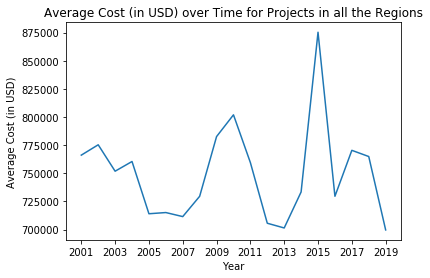

In [24]:
b = plt.plot(z['Year'],z['Cost'])
plt.xlabel('Year')
plt.ylabel('Average Cost (in USD)')
plt.title('Average Cost (in USD) over Time for Projects in all the Regions')
plt.xticks(np.arange(2001, 2020, 2)) 
b

__Now let's look at the Average Cost Per Year for Projects in the Americas.__

In [25]:
y = region_filter.groupby('Year', as_index = False)['Cost'].mean()
y['Cost'] = y['Cost'].round(2)
y = y.sort_values(by = ['Year'])
y

,Year,Cost
0,2001,753027.31
1,2002,759695.25
2,2003,730311.18
3,2004,734516.43
4,2005,694079.68
5,2006,704339.55
6,2007,697654.34
7,2008,724117.90
8,2009,800630.01
9,2010,841943.56


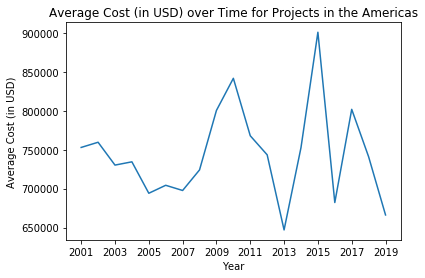

In [26]:
a = plt.plot(y['Year'],y['Cost'])
plt.xlabel('Year')
plt.ylabel('Average Cost (in USD)')
plt.title('Average Cost (in USD) over Time for Projects in the Americas')
plt.xticks(np.arange(2001, 2020, 2)) 
a

__Let's take this one step further - what if we look at the average cost for projects in all the regions but the Americas?__

In [27]:
region_filter_no_americas = dataset.loc[dataset['Region'] != 'Americas']
region_filter_no_americas.head(50) #Let's look at the first 50 values

,Project Number,Parameter,Category,Sub cat,Impact,TRL,Description,Region Numeric,Region,Project,Year,Month,Cost
3,3,Resource,Outsourcing,Late or poor output,13,7,Contractors failed to show up as committed,1,Asia,IT/Solution,2014,July,521495
5,5,Resource,Outsourcing,Late or poor output,16,7,Outsouced staff lacked the necessary skillset,3,Africa,IT/Solution,2014,June,498896
7,7,Resource,People,Loss,16,4,Chef quit two days before the café was schedul...,3,Africa,IT/Solution,2017,October,578928
8,8,Resource,People,Motivation,11,5,Work at customer site had to be done by union ...,3,Africa,IT/Solution,2003,July,318846
14,14,Resource,People,Queuing,18,5,US expertise needed for project in Asia. Team...,3,Africa,Prod. Dev.,2002,June,1214586
17,17,Resource,People,Temp loss,15,3,Manufacturing volumes spiked and diverted proj...,3,Africa,Prod. Dev.,2004,September,707610
19,19,Resource,People,Temp loss,13,7,Key team member grounded in Middle East during...,3,Africa,IT/Solution,2014,March,985595
24,24,Schedule,Delay,Hardware,14,5,"""Customer supplied"" hardware does not work. R...",3,Africa,IT/Solution,2001,September,639310
26,26,Schedule,Delay,Hardware,10,3,System needed was down for scheduled maintenan...,3,Africa,IT/Solution,2013,August,655540
35,35,Schedule,Delay,Parts,13,5,A needed component was not very stable and onl...,3,Africa,Prod. Dev.,2010,September,329706


In [28]:
c = region_filter_no_americas.groupby('Year', as_index = False)['Cost'].mean()
c['Cost'] = c['Cost'].round(2)
c = c.sort_values(by = ['Year'])
c

,Year,Cost
0,2001,779125.99
1,2002,795394.55
2,2003,774372.07
3,2004,784885.11
4,2005,733375.79
5,2006,727068.51
6,2007,744882.14
7,2008,734674.51
8,2009,757989.94
9,2010,730288.23


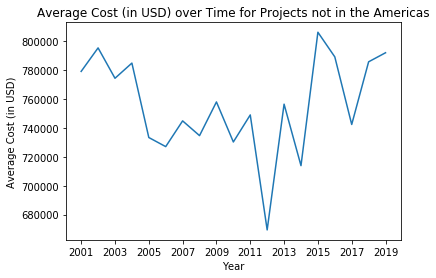

In [29]:
l = plt.plot(c['Year'],c['Cost'])
plt.xlabel('Year')
plt.ylabel('Average Cost (in USD)')
plt.title('Average Cost (in USD) over Time for Projects not in the Americas')
plt.xticks(np.arange(2001, 2020, 2)) 
l

__Now that we've looked at the cost breakdown over time per region - let's look at the difference in the Impact (in weeks) per region.__

In [30]:
d = dataset.groupby('Region', as_index = False)['Impact'].mean()
d['Impact'] = d['Impact'].round(2)
d

,Region,Impact
0,Africa,13.53
1,Americas,13.51
2,Asia,13.29
3,Eur/ME,13.41


__Let's take a look at how TRL values affect Impact.__ 

In [31]:
e = dataset.groupby('TRL', as_index = False)['Impact'].mean()
e['Impact'] = e['Impact'].round(2)
e

,TRL,Impact
0,1,13.70
1,2,13.13
2,3,13.45
3,4,13.37
4,5,13.76
5,6,13.83
6,7,13.43
7,8,12.82
8,9,12.29


<BarContainer object of 9 artists>

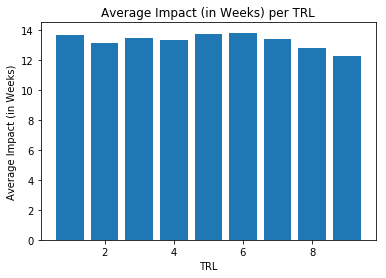

In [32]:
f = plt.bar(e['TRL'],e['Impact'])
plt.xlabel('TRL')
plt.ylabel('Average Impact (in Weeks)')
plt.title('Average Impact (in Weeks) per TRL')
f